In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## Train df

In [28]:
train_df_org = pd.read_csv('train(1).csv')
train_df_org.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
display(train_df_org.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [30]:
train_df_org.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train_df_org.isna().sum() / train_df_org.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [32]:
display(train_df_org['Age'].describe())
imputer = SimpleImputer(strategy='median')
train_df_org['Age'] = imputer.fit_transform(train_df_org[['Age']])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
train_df_org.drop(columns=['Cabin'], inplace=True)

In [34]:
train_df_org.isna().sum() / train_df_org.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [35]:
train_df_org.dropna(inplace=True)

In [36]:
train_df_org.duplicated().sum()

np.int64(0)

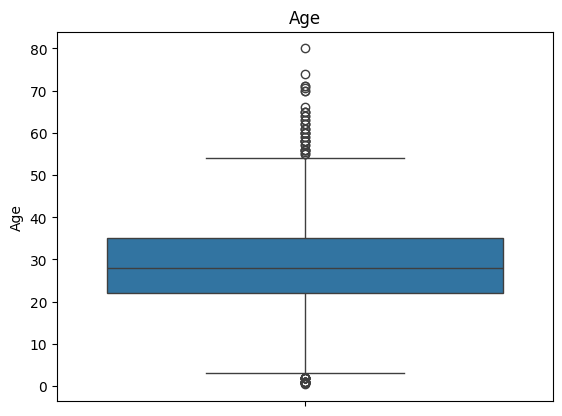

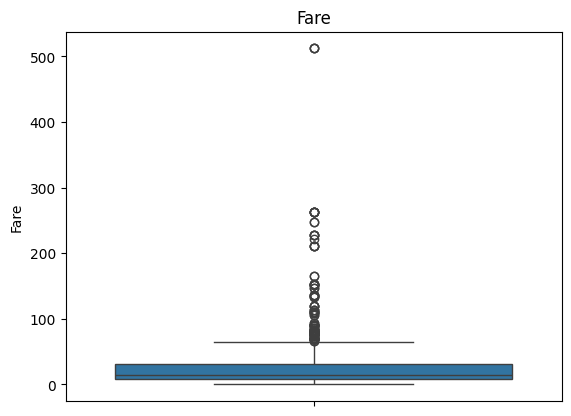

In [37]:
for col in ['Age', 'Fare']:
    sns.boxplot(y=train_df_org[col])
    plt.title(col)
    plt.show()

In [38]:
for col in ['Age', 'Fare']:
    iqr = train_df_org[col].quantile(0.75) - train_df_org[col].quantile(0.25)
    lower_bound = train_df_org[col].quantile(0.25) - 1.5 * iqr
    upper_bound = train_df_org[col].quantile(0.75) + 1.5 * iqr
    train_df_org = train_df_org[(train_df_org[col] >= lower_bound) & (train_df_org[col] <= upper_bound)]


In [39]:
train_df_org.shape

(718, 11)

In [40]:
train_sex_encoder = LabelEncoder()
train_df_org['Sex'] = train_sex_encoder.fit_transform(train_df_org[['Sex']])
train_df_org = pd.get_dummies(train_df_org, columns=['Embarked'], prefix='Embarked')
display(train_df_org.head())

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,False,True,False


In [41]:
train_feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']
train_target_col = ['Survived']

In [42]:
"""
for col in train_feature_cols:
    sns.boxplot(x=train_df_org[col])
    plt.title(col)
    plt.show()
"""

'\nfor col in train_feature_cols:\n    sns.boxplot(x=train_df_org[col])\n    plt.title(col)\n    plt.show()\n'

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Embarked_Q,Survived
0,3,1,22.0,1,0,7.2500,False,True,False,0
2,3,0,26.0,0,0,7.9250,False,True,False,1
3,1,0,35.0,1,0,53.1000,False,True,False,1
4,3,1,35.0,0,0,8.0500,False,True,False,0
5,3,1,28.0,0,0,8.4583,False,False,True,0


<Axes: >

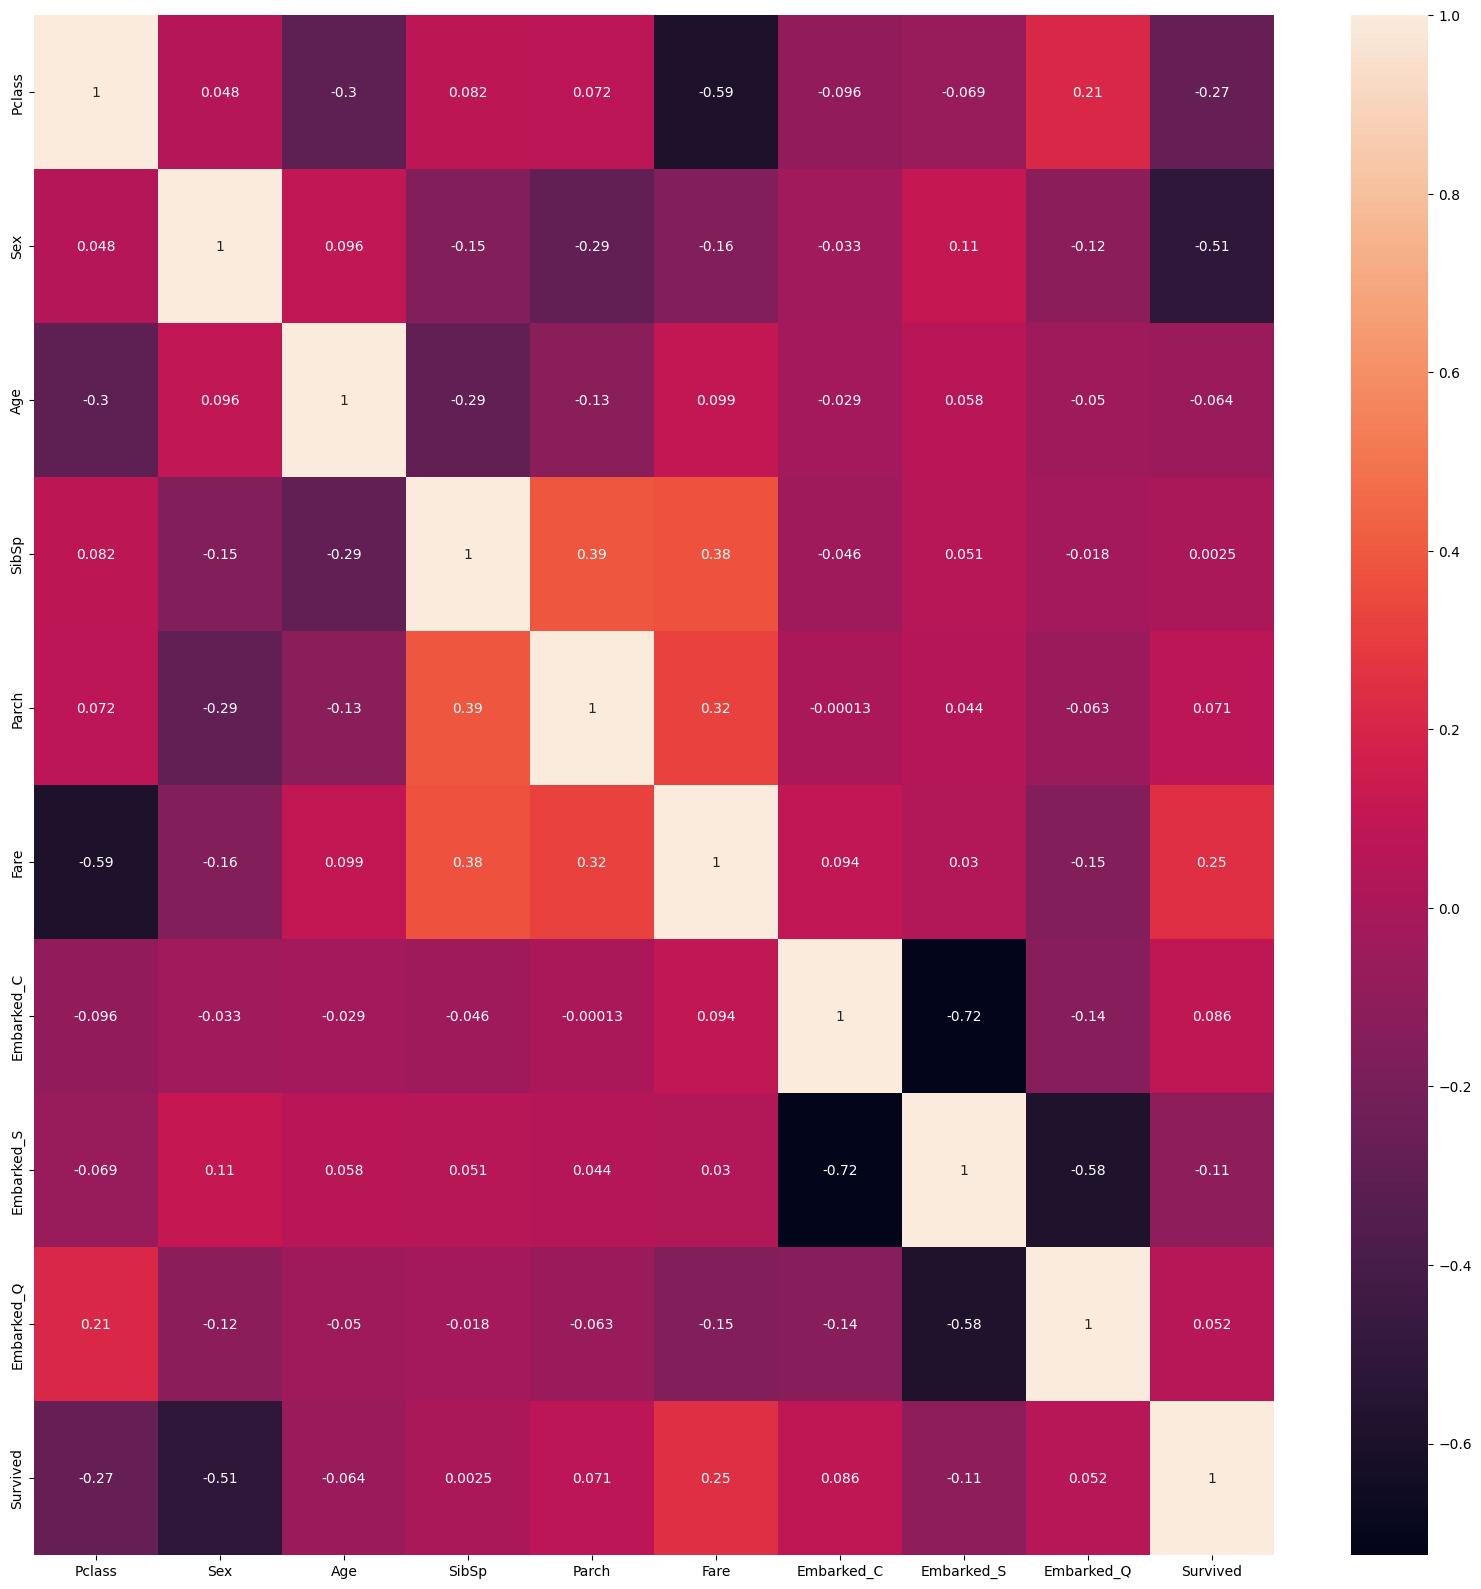

In [43]:
train_corr_df = train_df_org[train_feature_cols + train_target_col]
display(train_corr_df.head())
fig_heatMap1, ax_heatMap1 = plt.subplots()
fig_heatMap1.set_size_inches(20,20)
sns.heatmap(train_corr_df.corr(), annot=True, ax=ax_heatMap1)

In [44]:
X = train_df_org[train_feature_cols]
y = train_df_org[train_target_col]
X_scaled = StandardScaler().fit_transform(X)
#y_scaled = StandardScaler().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=85)

In [45]:
train_logistic_mdl = LogisticRegression()
train_logistic_mdl.fit(X_train, y_train)

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
y_pred_train = train_logistic_mdl.predict(X_test)

In [47]:
train_logistic_mdl.score(X_test, y_test)

0.8125

In [48]:
display(confusion_matrix(y_test, y_pred_train))

array([[84, 12],
       [15, 33]])

<Axes: >

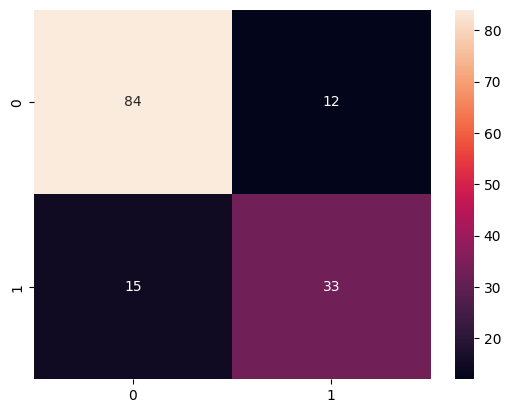

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred_train), annot=True)

In [50]:
print(classification_report(y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        96
           1       0.73      0.69      0.71        48

    accuracy                           0.81       144
   macro avg       0.79      0.78      0.79       144
weighted avg       0.81      0.81      0.81       144



## heart df

In [51]:
heart_df_org = pd.read_csv('heart.csv')
heart_df_org.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
heart_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
heart_df_org.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
heart_features = heart_df_org.drop(columns=['target'])
heart_target = heart_df_org['target']

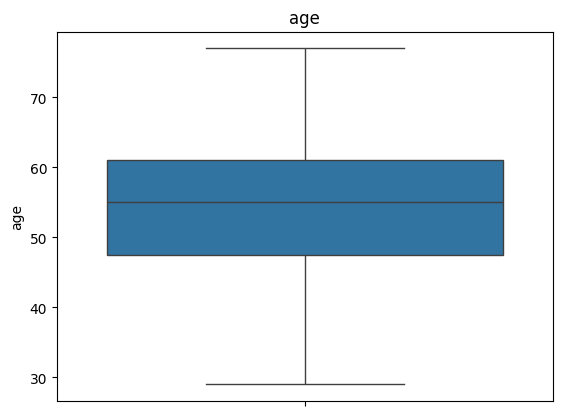

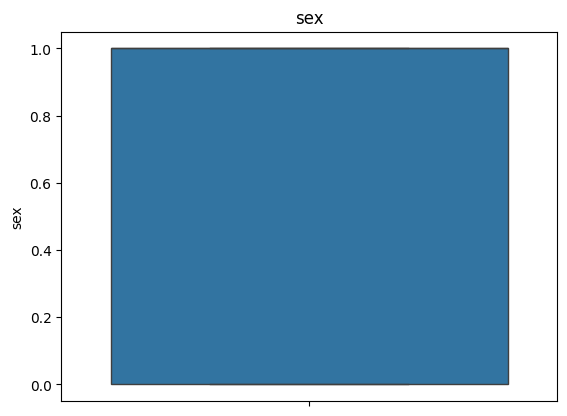

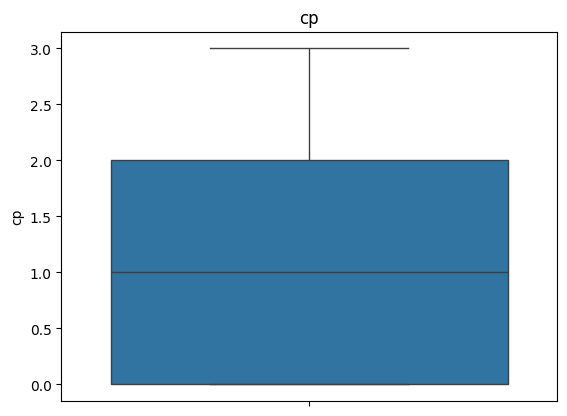

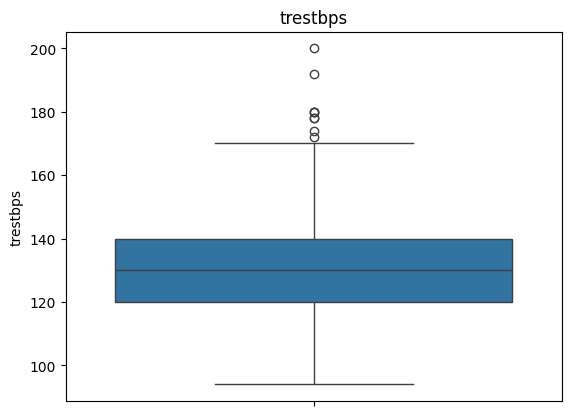

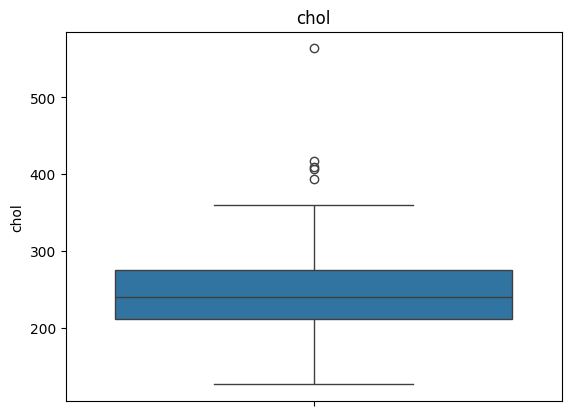

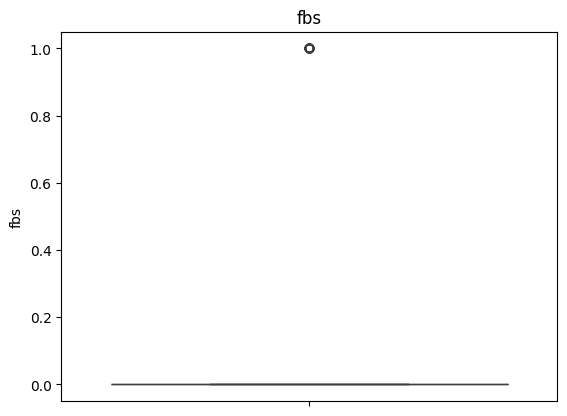

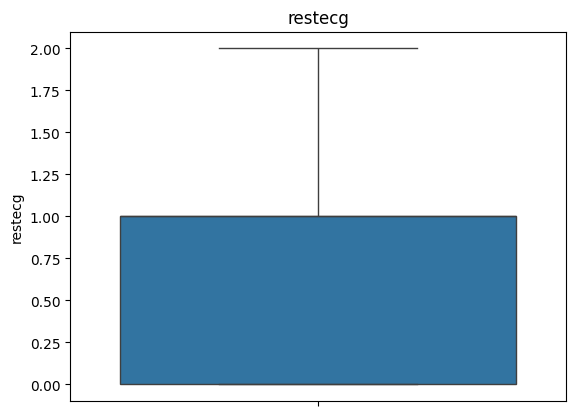

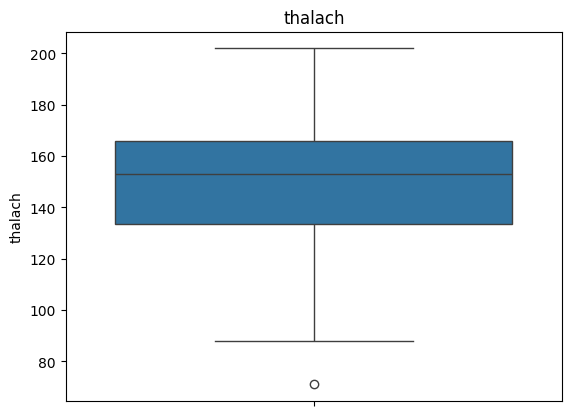

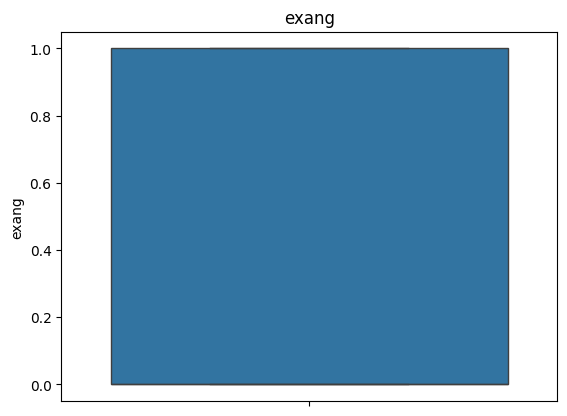

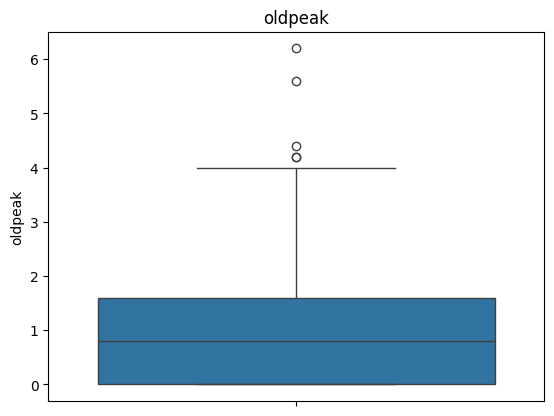

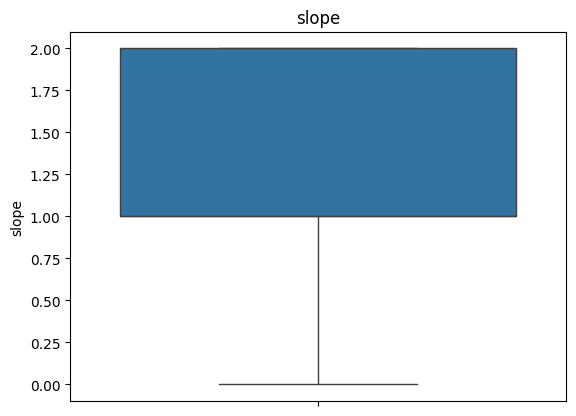

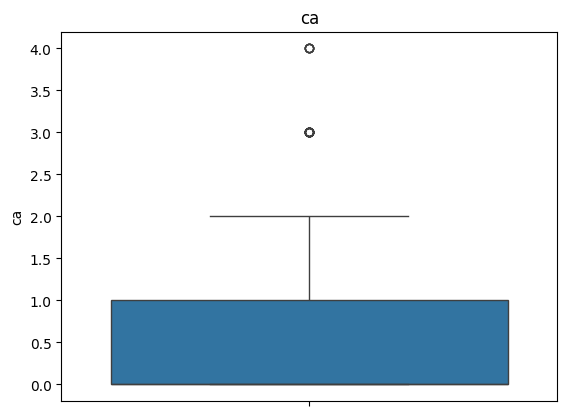

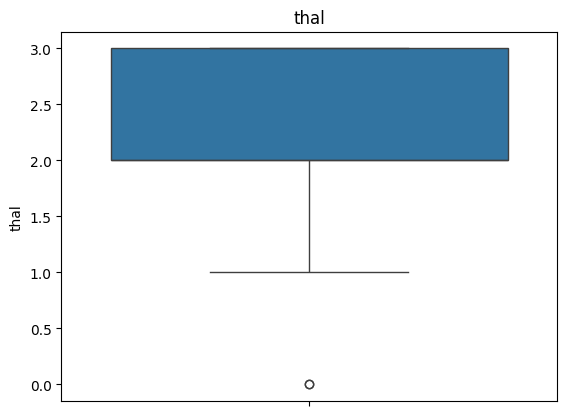

In [55]:
for col in heart_features.columns:
    sns.boxplot(y=heart_features[col])
    plt.title(col)
    plt.show()

In [56]:

"""for col in list(heart_features.columns):
  iqr_heart_col = heart_df_org[col].quantile(0.75) - heart_df_org[col].quantile(0.25)
  lower_bound_heart_col = heart_df_org[col].quantile(0.25) - 1.5 * iqr
  upper_bound_heart_col = heart_df_org[col].quantile(0.75) + 1.5 * iqr
  heart_df_org = heart_df_org[(heart_df_org[col] >= lower_bound_heart_col) & (heart_df_org[col] <= upper_bound_heart_col)]
"""

'for col in list(heart_features.columns):\n  iqr_heart_col = heart_df_org[col].quantile(0.75) - heart_df_org[col].quantile(0.25)\n  lower_bound_heart_col = heart_df_org[col].quantile(0.25) - 1.5 * iqr\n  upper_bound_heart_col = heart_df_org[col].quantile(0.75) + 1.5 * iqr\n  heart_df_org = heart_df_org[(heart_df_org[col] >= lower_bound_heart_col) & (heart_df_org[col] <= upper_bound_heart_col)]\n'

In [57]:
heart_df_org.shape

(303, 14)

In [58]:
heart_df_org.duplicated().sum()

np.int64(1)

<Axes: >

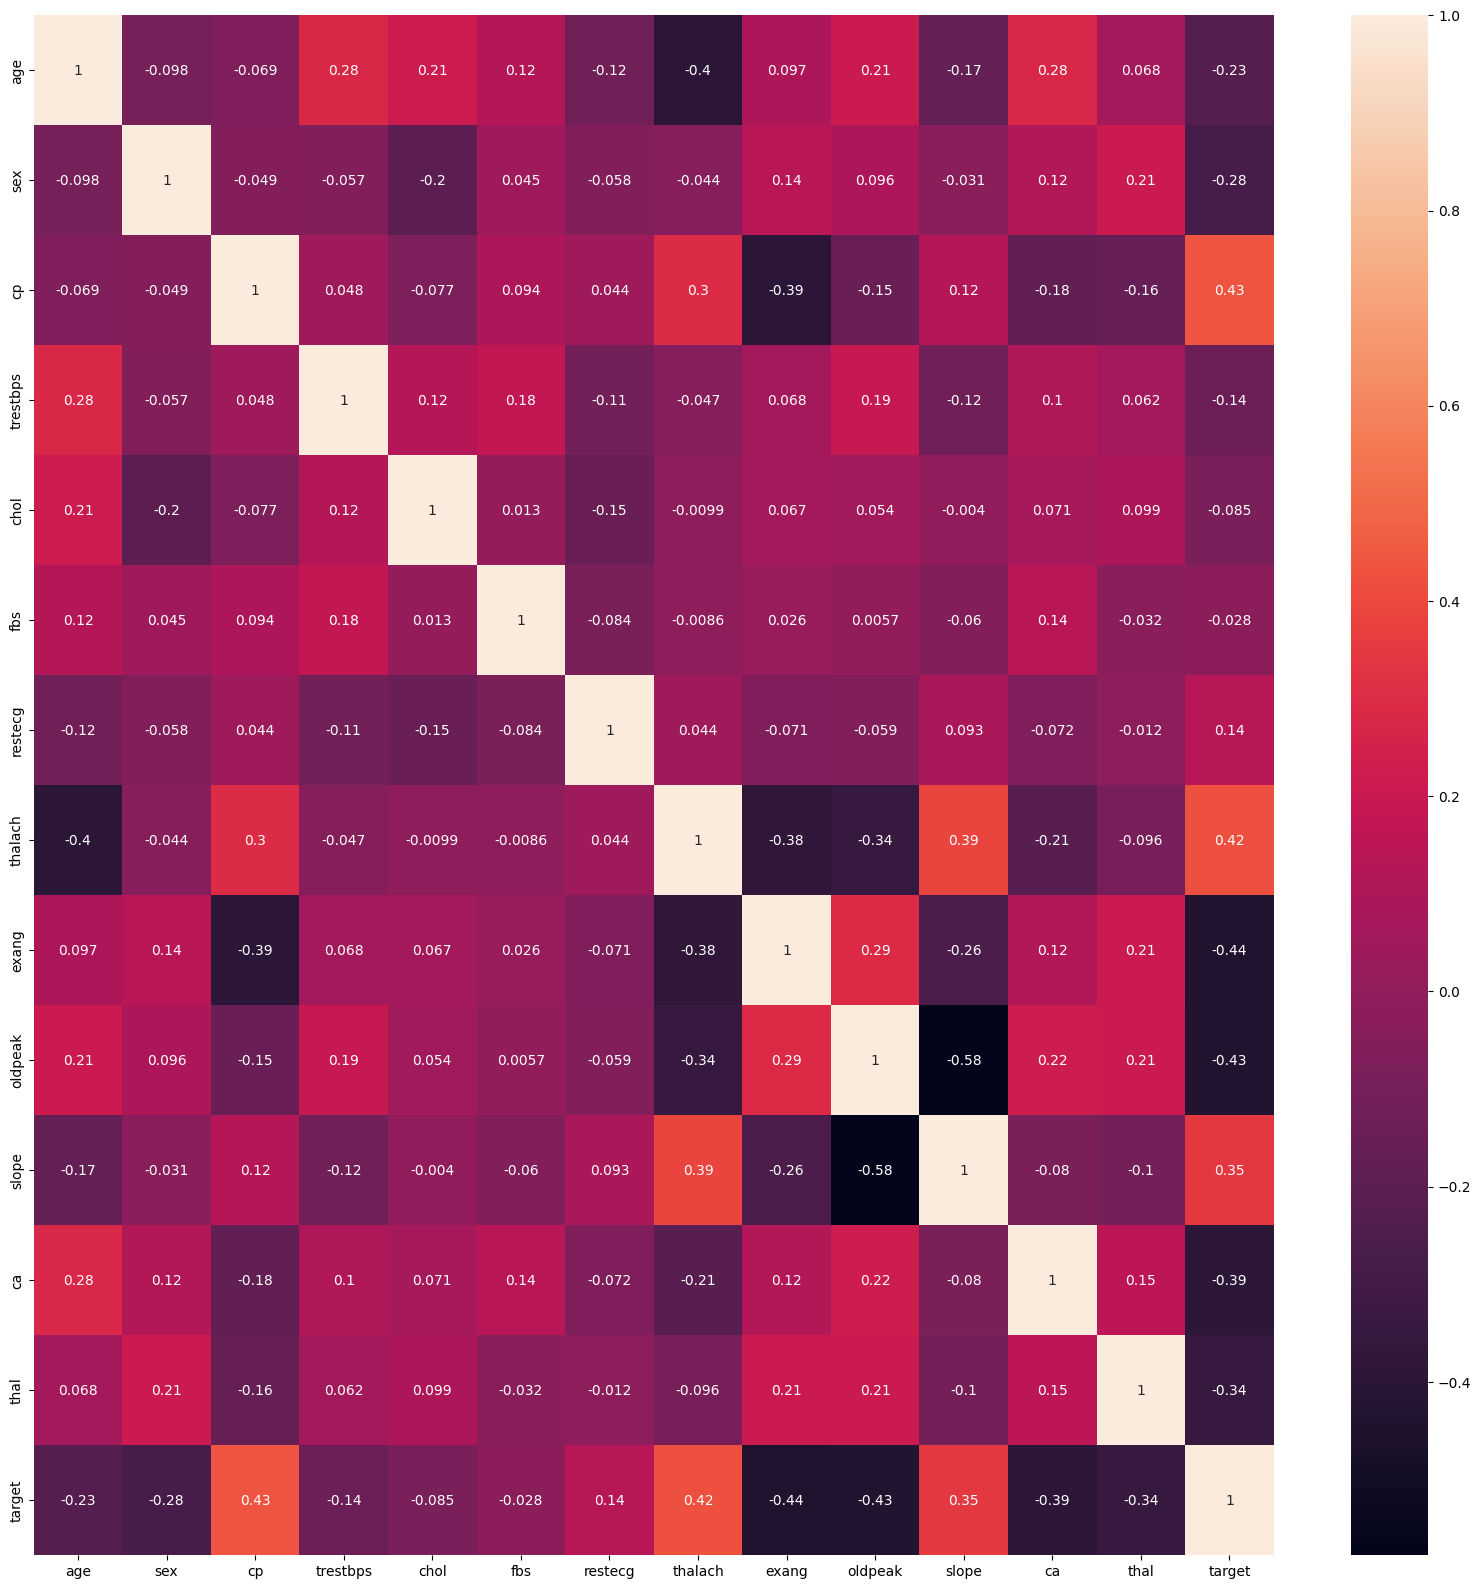

In [100]:
fig_heatMap_heart, ax_heatMap_heart = plt.subplots()
fig_heatMap_heart.set_size_inches(20,20)
sns.heatmap(heart_df_org.corr(), annot=True, ax=ax_heatMap_heart)

In [101]:
corr_mat = heart_df_org.corr()
corr_mat['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [102]:
heart_features = heart_df_org.drop(columns=['target'])
heart_target = heart_df_org['target']

In [103]:
transformed_std_scaler_heart = StandardScaler()
heart_features_scaled = transformed_std_scaler_heart.fit_transform(heart_features)
heart_target = heart_df_org['target']
X_train, X_test, y_train, y_test = train_test_split(heart_features_scaled, heart_target, test_size=0.2, random_state=42)

In [104]:
mdl_heart = LogisticRegression()
mdl_heart.fit(X_train, y_train)
y_pred_heart = mdl_heart.predict(X_test)

In [105]:
mdl_heart.score(X_test, y_test)

0.8524590163934426

<Axes: >

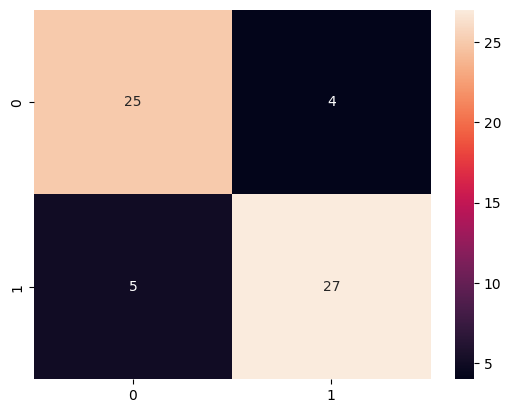

In [106]:
sns.heatmap(confusion_matrix(y_test, y_pred_heart), annot=True)

In [107]:
print(classification_report(y_test, y_pred_heart))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## diabetes df

In [67]:
diabetes_df_org = pd.read_csv('diabetes2.csv')
diabetes_df_org.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
diabetes_df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
diabetes_df_org.duplicated().sum()

np.int64(0)

In [70]:
diabetes_df_org.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
diabetes_features = diabetes_df_org.drop(columns=['Outcome'])
diabetes_target = diabetes_df_org['Outcome']

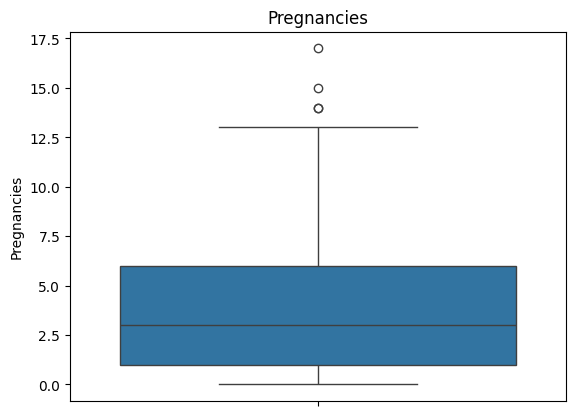

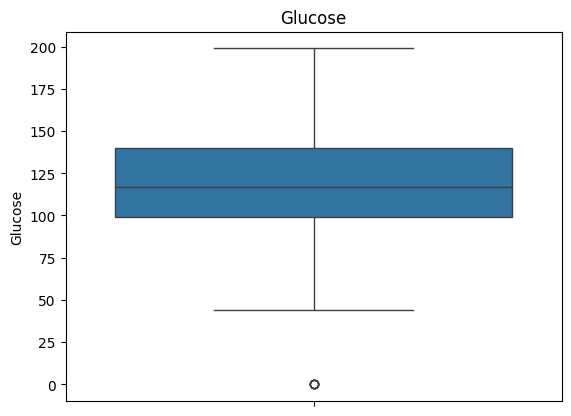

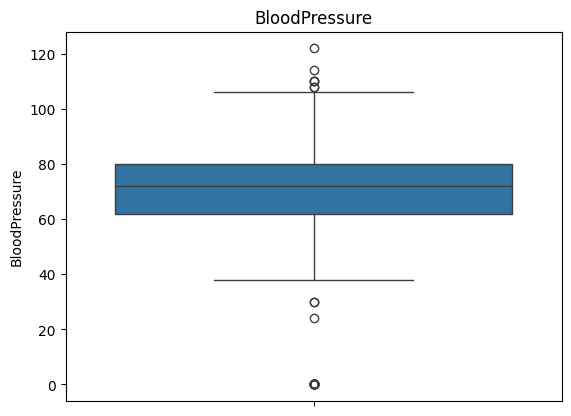

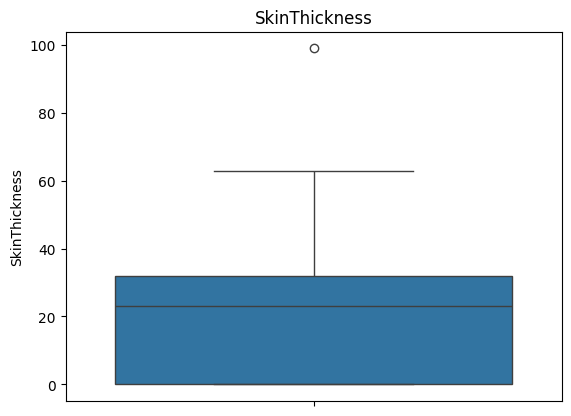

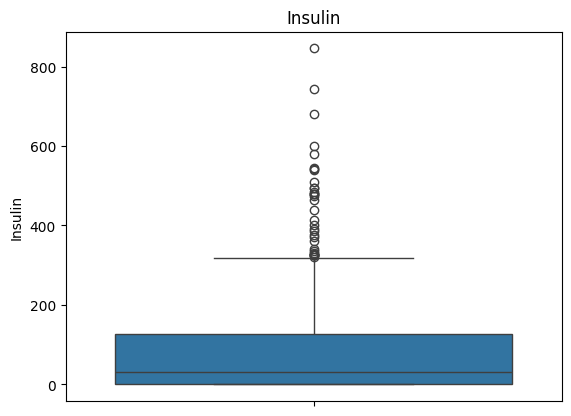

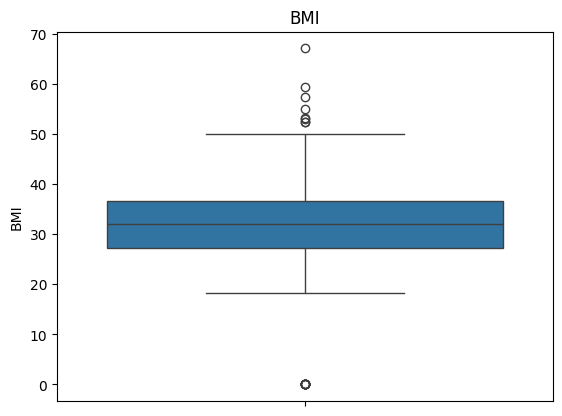

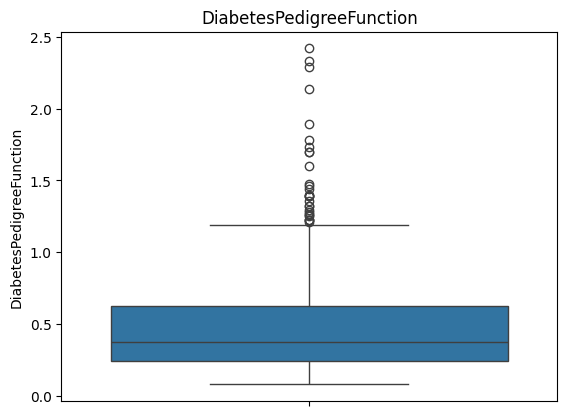

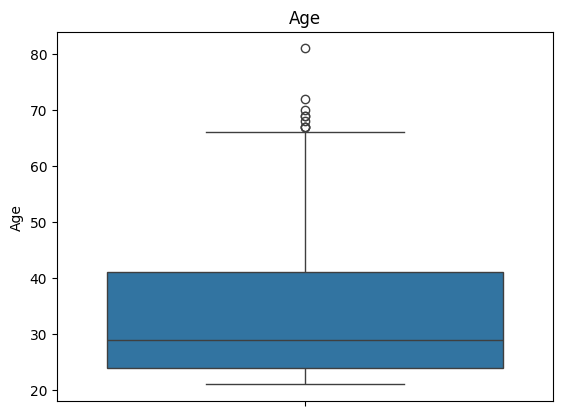

In [72]:
for col in diabetes_features.columns:
    sns.boxplot(y=diabetes_features[col])
    plt.title(col)
    plt.show()

In [73]:
for col in list(diabetes_features.columns):
  iqr_diabetes_col = diabetes_df_org[col].quantile(0.75) - diabetes_df_org[col].quantile(0.25)
  lower_bound_diabetes_col = diabetes_df_org[col].quantile(0.25) - 1.5 * iqr
  upper_bound_diabetes_col = diabetes_df_org[col].quantile(0.75) + 1.5 * iqr
  diabetes_df_org = diabetes_df_org[(diabetes_df_org[col] >= lower_bound_diabetes_col) & (diabetes_df_org[col] <= upper_bound_diabetes_col)]

In [74]:
diabetes_df_org.shape

(542, 9)

In [108]:
diabetes_features = diabetes_df_org.drop(columns=['Outcome'])
diabetes_target = diabetes_df_org['Outcome']

In [157]:
diabetes_features_scaled = StandardScaler().fit_transform(diabetes_features)

In [160]:
mdl_diabetes = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(diabetes_features, diabetes_target, test_size=0.2, random_state=42)

In [161]:
mdl_diabetes.fit(X_train, y_train)
y_pred_diabetes = mdl_diabetes.predict(X_test)

/home/sh3rawy/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
mdl_diabetes.score(X_test, y_test)

0.8623853211009175

[[77  2]
 [13 17]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        79
           1       0.89      0.57      0.69        30

    accuracy                           0.86       109
   macro avg       0.88      0.77      0.80       109
weighted avg       0.87      0.86      0.85       109



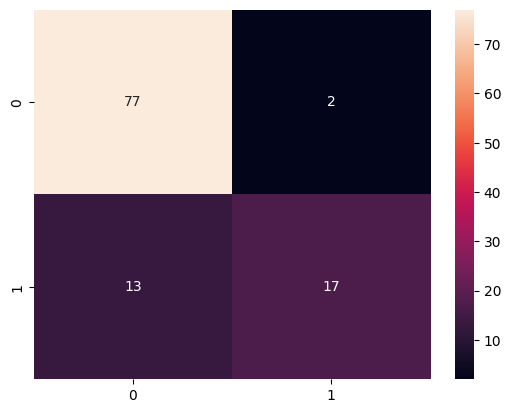

In [163]:
sns.heatmap(confusion_matrix(y_test, y_pred_diabetes), annot=True)
print(confusion_matrix(y_test, y_pred_diabetes))
print(classification_report(y_test, y_pred_diabetes))

## Iris df

In [164]:
from sklearn import datasets
iris = datasets.load_iris()

In [165]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [166]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [167]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [168]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [169]:
features_cols_iris_df  = iris_df.drop(columns=['target']).columns
target_cols_iris_df = ['target']

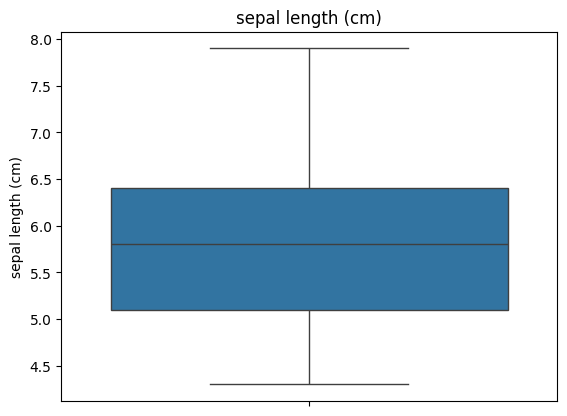

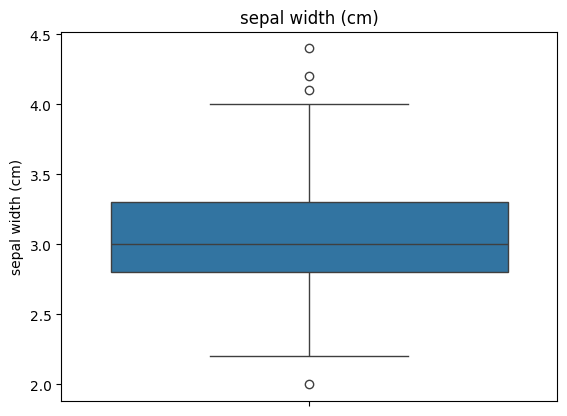

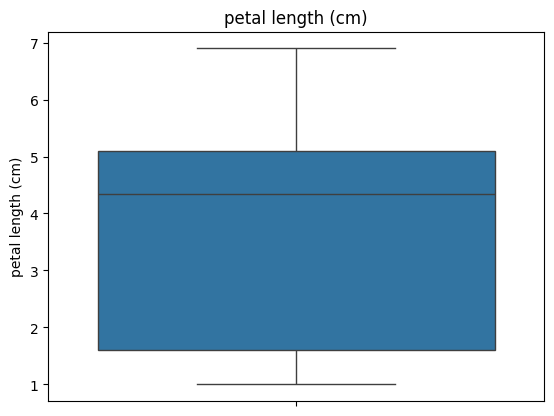

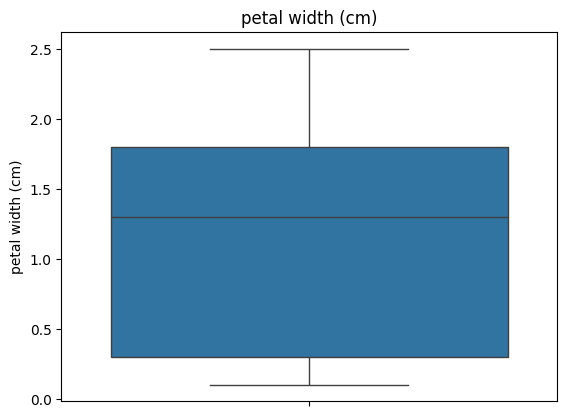

In [170]:
for col in features_cols_iris_df:
    sns.boxplot(y=iris_df[col])
    plt.title(col)
    plt.show()

In [171]:
for col in features_cols_iris_df:
  iqr = iris_df[col].quantile(0.75) - iris_df[col].quantile(0.25)
  lower_bound = iris_df[col].quantile(0.25) - 1.5 * iqr
  upper_bound = iris_df[col].quantile(0.75) + 1.5 * iqr
  iris_df = iris_df[(iris_df[col] >= lower_bound) & (iris_df[col] <= upper_bound)]

In [172]:
iris_df.shape

(146, 5)

<Axes: >

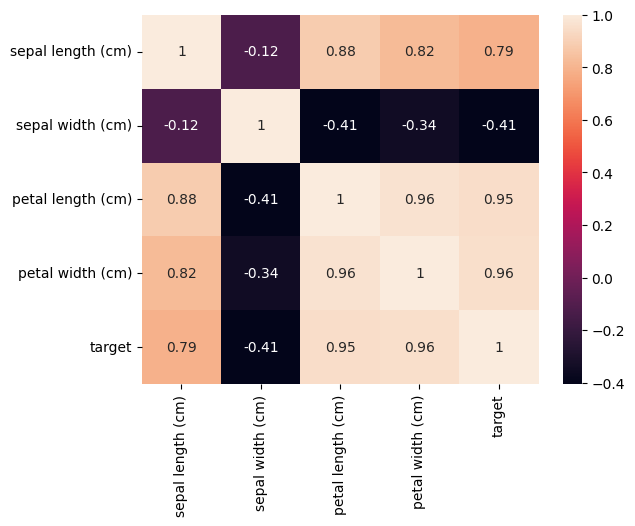

In [173]:
sns.heatmap(iris_df.corr(), annot=True)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

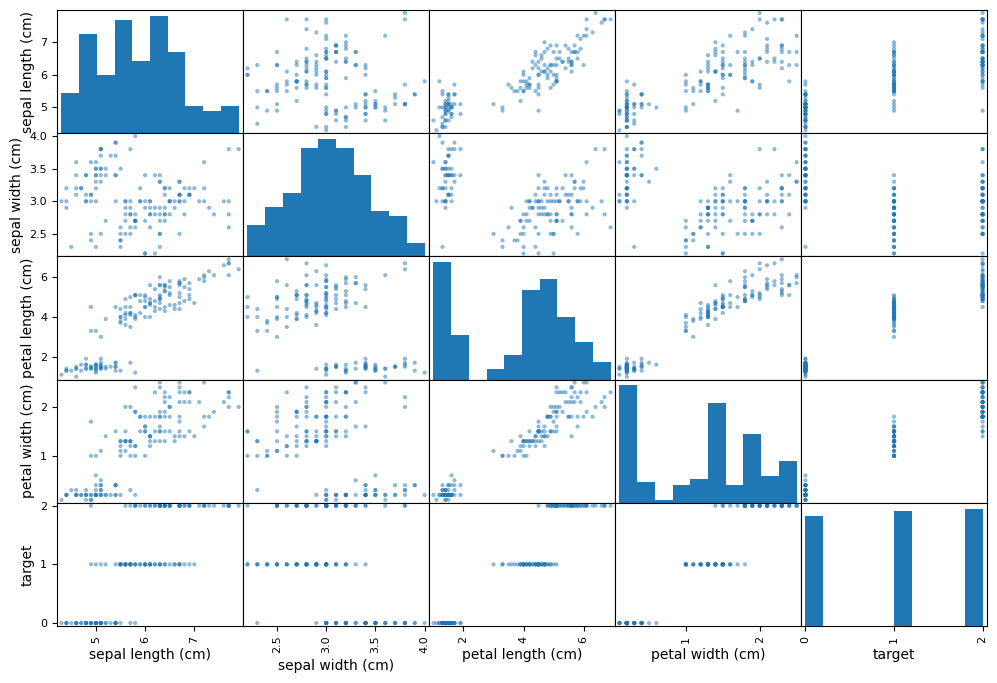

In [174]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(12, 8))

In [175]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.040411,3.806849,1.220548,1.020548
std,0.834093,0.397853,1.758042,0.759393,0.817643
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [176]:
features_iris = iris_df.drop(columns=['target'])
target_iris = iris_df['target']
features_iris_scaled = MinMaxScaler().fit_transform(features_iris)
features_iris_scaled = pd.DataFrame(features_iris_scaled, columns=features_iris.columns)
features_iris_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,146.000000,146.000000,146.000000,146.000000
mean,0.432458,0.466895,0.475737,0.466895
std,0.231693,0.221029,0.297973,0.316414
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.444444,0.576271,0.500000
75%,0.583333,0.611111,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [177]:
iris_mdl_logistic = LogisticRegression()
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features_iris_scaled, target_iris, test_size=0.2, random_state=42)

In [178]:
iris_mdl_logistic.fit(X_train_iris, y_train_iris)
y_pred_iris = iris_mdl_logistic.predict(X_test_iris)

In [179]:
iris_mdl_logistic.score(X_test_iris, y_test_iris)

0.9333333333333333

In [180]:
print(confusion_matrix(y_pred_iris, y_test_iris))

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


In [181]:
print(classification_report(y_pred_iris, y_test_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



<Axes: >

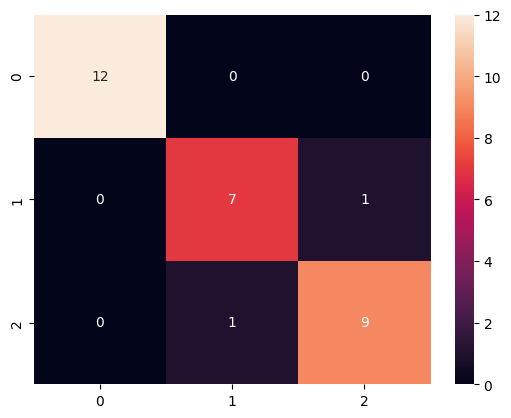

In [182]:
sns.heatmap(confusion_matrix(y_pred_iris, y_test_iris), annot=True)